In [268]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torchvision.datasets import DatasetFolder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torchvision.models as models
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import timm

In [269]:
df = pd.read_csv('train.csv')

In [270]:
df.describe()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,...,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,0.266667,0.385453,0.086769,0.317084,0.400414,0.093063,0.173532,-0.174072,-0.074659,-0.135957,...,0.417874,-0.405061,0.091497,-0.276132,-0.133123,-0.156475,-0.096026,0.372260,-0.222551,0.006532
std,0.442259,0.929075,0.898979,0.969380,0.954504,0.968625,0.895351,1.001566,0.906168,0.972163,...,0.941354,1.054231,0.958970,0.989820,1.042036,1.019384,0.913732,0.944429,0.973640,0.897006
min,0.000000,-3.462941,-3.605773,-4.078232,-3.344323,-3.613712,-3.319666,-3.627701,-3.528635,-4.503662,...,-3.684054,-3.385650,-3.162629,-3.022903,-3.698249,-4.791005,-3.356509,-3.933762,-4.174752,-3.624981
25%,0.000000,-0.286854,-0.470281,-0.379984,-0.290078,-0.644337,-0.392807,-0.980593,-0.677763,-0.914803,...,-0.254776,-1.265848,-0.594289,-1.054700,-1.009256,-0.833164,-0.684567,-0.301254,-1.010557,-0.564394
50%,0.000000,0.598422,0.071867,0.518698,0.653512,0.141549,0.237502,-0.180645,-0.159631,-0.108885,...,0.648944,-0.489479,0.192821,-0.301887,-0.139792,-0.197277,-0.156927,0.612440,-0.241763,-0.008017
75%,1.000000,1.108212,0.609769,1.085552,1.135854,0.950304,0.747622,0.621790,0.450741,0.627055,...,1.131876,0.366639,0.779280,0.409370,0.740059,0.493094,0.434146,1.109200,0.508097,0.552090
max,1.000000,3.439295,3.581171,3.991985,3.900672,3.488667,3.193113,3.062756,3.877255,3.017000,...,4.077517,3.550058,3.790435,3.907684,3.777545,3.269490,3.526907,3.542401,3.642856,3.718869


In [271]:
df.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [272]:
df['labels'].value_counts()

0    3850
1    1400
Name: labels, dtype: int64

In [273]:
corr=df.corr()

# Data Preprocessing

In [274]:
num_components = 150
features = df.drop('labels', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=num_components)
features_reduced = pca.fit_transform(features_scaled)

In [275]:
df_processed = pd.DataFrame(features_reduced, columns=[f'f_{i}' for i in range(num_components)])
df_processed['labels'] = df['labels']

Splitting training dataset into train and test to see training loss and testing accuracy

In [276]:
target_column = 'labels' 
features = df_processed.drop(target_column, axis=1).values
labels = df_processed[target_column].values

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2,stratify=labels, random_state=42)

train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ResNet Model

In [277]:
# ResNet-based model
class ResNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ResNetModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.resnet = models.resnet152(pretrained=True)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = train_features.shape[1]
hidden_size = 256
num_classes = 2

model = ResNetModel(input_size, hidden_size, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    
    for features, labels in train_loader:
        features = features.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * features.size(0)
    
    train_loss /= len(train_dataset)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
    
    model.eval()
    correct = 0
    total = 0
    predictions = []
    true_labels = []
    probs_positive = []
    
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.to(device)
            labels = labels.to(device)
            
            outputs = model(features)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())
            probs_positive.extend(probabilities[:, 1].cpu().numpy())
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracy = correct / total
    
    print(f'Test Accuracy: {test_accuracy:.2%}')
    
torch.save(model.state_dict(), 'trained_model_weights.pth')


c:\users\s24ab\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\s24ab\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.3674
Test Accuracy: 84.86%
Epoch [2/20], Train Loss: 0.2628
Test Accuracy: 85.24%
Epoch [3/20], Train Loss: 0.1982
Test Accuracy: 85.05%
Epoch [4/20], Train Loss: 0.1337
Test Accuracy: 85.81%
Epoch [5/20], Train Loss: 0.0817
Test Accuracy: 85.14%
Epoch [6/20], Train Loss: 0.0449
Test Accuracy: 85.33%
Epoch [7/20], Train Loss: 0.0238
Test Accuracy: 85.43%
Epoch [8/20], Train Loss: 0.0142
Test Accuracy: 85.33%
Epoch [9/20], Train Loss: 0.0095
Test Accuracy: 85.52%
Epoch [10/20], Train Loss: 0.0067
Test Accuracy: 85.43%
Epoch [11/20], Train Loss: 0.0050
Test Accuracy: 85.24%
Epoch [12/20], Train Loss: 0.0039
Test Accuracy: 85.24%
Epoch [13/20], Train Loss: 0.0032
Test Accuracy: 85.43%
Epoch [14/20], Train Loss: 0.0026
Test Accuracy: 85.52%
Epoch [15/20], Train Loss: 0.0022
Test Accuracy: 85.52%
Epoch [16/20], Train Loss: 0.0018
Test Accuracy: 85.52%
Epoch [17/20], Train Loss: 0.0016
Test Accuracy: 85.33%
Epoch [18/20], Train Loss: 0.0013
Test Accuracy: 85.43%
E

# Analysis on ResNet Model

In [278]:
print('For ResNet model: ')
print('Classification Report:')
print(classification_report(true_labels, predictions))
print('Confusion Matrix:')
print(confusion_matrix(true_labels, predictions))

For ResNet model: 
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       770
           1       0.79      0.61      0.69       280

    accuracy                           0.85      1050
   macro avg       0.83      0.77      0.80      1050
weighted avg       0.85      0.85      0.85      1050

Confusion Matrix:
[[726  44]
 [110 170]]


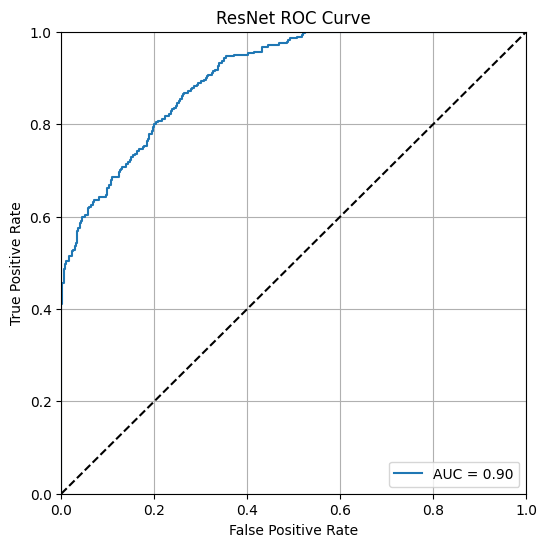

In [279]:
# ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, probs_positive)
auc = roc_auc_score(true_labels, probs_positive)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

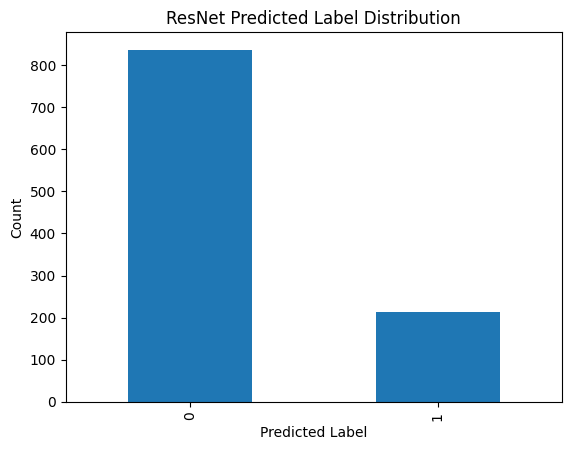

In [280]:
# Class Distribution
class_distribution = pd.Series(predictions).value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('ResNet Predicted Label Distribution')
plt.show()

# VIT Model

In [281]:
class ViTModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ViTModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.vit = timm.create_model('vit_base_patch16_224', pretrained=True)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
input_size = train_features.shape[1]
hidden_size =512
num_classes = 2 

vit_model = ViTModel(input_size, hidden_size, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model = vit_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=0.001)
num_epochs = 20

for epoch in range(num_epochs):
    vit_model.train()
    train_loss = 0.0
    
    for features, labels in train_loader:
        features = features.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = vit_model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * features.size(0)
    
    train_loss /= len(train_dataset)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
    
    vit_model.eval()
    correct = 0
    total = 0
    vit_predictions = []
    vit_true_labels = []
    vit_probs_positive = []
    
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.to(device)
            labels = labels.to(device)
            
            outputs = vit_model(features)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs.data, 1)
            vit_predictions.extend(predicted.tolist())
            vit_true_labels.extend(labels.tolist())
            vit_probs_positive.extend(probabilities[:, 1].cpu().numpy())
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracy = correct / total
    
    print(f'Test Accuracy: {test_accuracy:.2%}')
    
torch.save(vit_model.state_dict(), 'trained_vit_model_weights.pth')

Epoch [1/20], Train Loss: 0.3536
Test Accuracy: 85.62%
Epoch [2/20], Train Loss: 0.2453
Test Accuracy: 85.24%
Epoch [3/20], Train Loss: 0.1672
Test Accuracy: 85.62%
Epoch [4/20], Train Loss: 0.0908
Test Accuracy: 85.05%
Epoch [5/20], Train Loss: 0.0424
Test Accuracy: 85.90%
Epoch [6/20], Train Loss: 0.0205
Test Accuracy: 86.00%
Epoch [7/20], Train Loss: 0.0100
Test Accuracy: 84.86%
Epoch [8/20], Train Loss: 0.0063
Test Accuracy: 85.33%
Epoch [9/20], Train Loss: 0.0044
Test Accuracy: 85.33%
Epoch [10/20], Train Loss: 0.0034
Test Accuracy: 85.81%
Epoch [11/20], Train Loss: 0.0026
Test Accuracy: 86.00%
Epoch [12/20], Train Loss: 0.0021
Test Accuracy: 86.19%
Epoch [13/20], Train Loss: 0.0017
Test Accuracy: 85.90%
Epoch [14/20], Train Loss: 0.0014
Test Accuracy: 86.19%
Epoch [15/20], Train Loss: 0.0012
Test Accuracy: 86.10%
Epoch [16/20], Train Loss: 0.0010
Test Accuracy: 86.10%
Epoch [17/20], Train Loss: 0.0009
Test Accuracy: 86.00%
Epoch [18/20], Train Loss: 0.0008
Test Accuracy: 86.00%
E

# Analysis on VIT Model

In [282]:
print('For VIT model:')

print('Classification Report:')
print(classification_report(vit_true_labels, vit_predictions))
print('Confusion Matrix:')
print(confusion_matrix(vit_true_labels, vit_predictions))

For VIT model:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       770
           1       0.81      0.61      0.70       280

    accuracy                           0.86      1050
   macro avg       0.84      0.78      0.80      1050
weighted avg       0.86      0.86      0.85      1050

Confusion Matrix:
[[730  40]
 [108 172]]


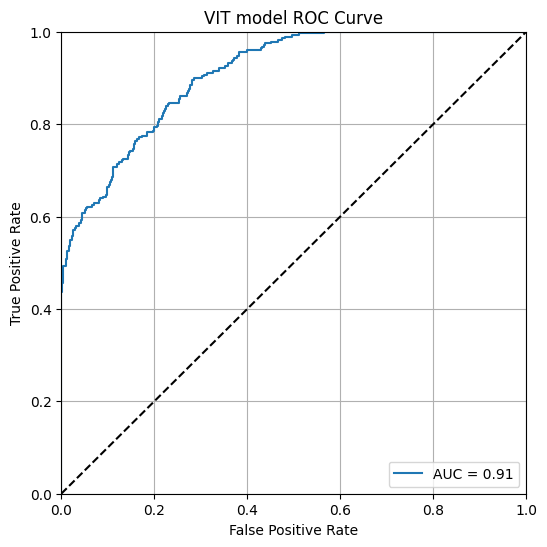

In [283]:
# ROC curve
fpr, tpr, thresholds = roc_curve(vit_true_labels, vit_probs_positive)
auc = roc_auc_score(vit_true_labels, vit_probs_positive)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VIT model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

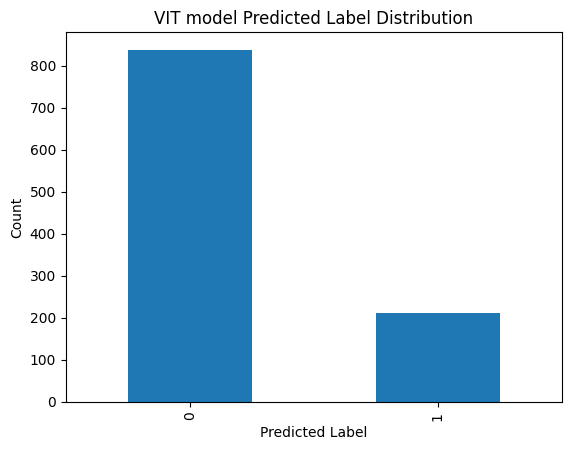

In [284]:
# Class Distribution
class_distribution = pd.Series(vit_predictions).value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('VIT model Predicted Label Distribution')
plt.show()

# Now making Predictions of test.csv using both the models(ResNet and VIT) separately

In [285]:
unseen_dataset = pd.read_csv('test.csv')
unseen_dataset.drop(['id'],axis=1,inplace=True)
unseen_features = unseen_dataset.values

scaler = StandardScaler()
unseen_features = scaler.fit_transform(unseen_features)
unseen_features = pca.transform(unseen_features)
unseen_features_tensor = torch.tensor(unseen_features, dtype=torch.float32)

class UnseenDataset(Dataset):
    def __init__(self, features):
        self.features = features
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        return feature

unseen_loader = DataLoader(UnseenDataset(unseen_features_tensor), batch_size=batch_size, shuffle=False)

In [286]:
model.load_state_dict(torch.load('trained_model_weights.pth'))
model = model.to(device)
model.eval()
predictions = []

with torch.no_grad():
    for features in unseen_loader:
        features = features.to(device)
        
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

data={'id': np.arange(1,len(predictions)+1),'labels':predictions}
solution=pd.DataFrame(data)
solution.to_csv('solution.csv',index=False)

In [287]:
vit_model.load_state_dict(torch.load('trained_vit_model_weights.pth'))
vit_model = vit_model.to(device)
vit_model.eval()
vit_predictions = []

with torch.no_grad():
    for features in unseen_loader:
        features = features.to(device)
        
        outputs = vit_model(features)
        _, predicted = torch.max(outputs.data, 1)
        vit_predictions.extend(predicted.cpu().numpy())
        
vit_data={'id': np.arange(1,len(vit_predictions)+1),'labels':vit_predictions}
vit_solution=pd.DataFrame(vit_data)
vit_solution.to_csv('vit_solution.csv',index=False)